In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('C:/Users/satis/OneDrive/Desktop/hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [7]:
df.shape

(5000, 3)

In [8]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [9]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

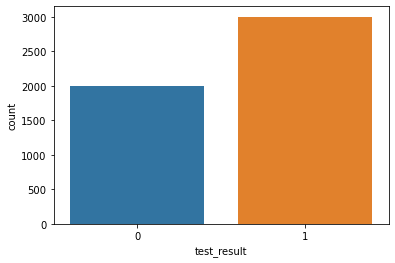

In [10]:
sns.countplot(data=df, x= 'test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

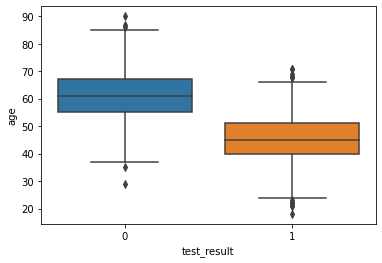

In [11]:
#plt.figure(dpi= 150)
sns.boxplot(x='test_result', y='age', data = df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

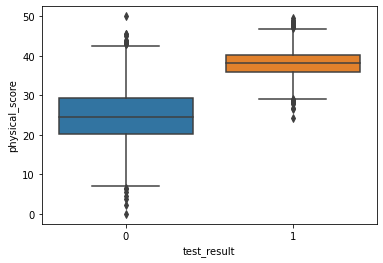

In [12]:
sns.boxplot(x='test_result', y='physical_score', data = df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

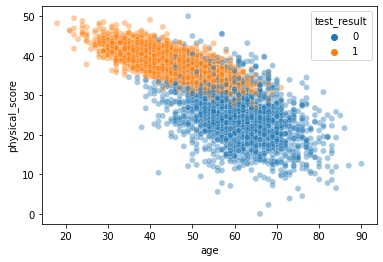

In [13]:
sns.scatterplot(x='age', y= 'physical_score', data =df, hue = 'test_result', alpha = 0.4)

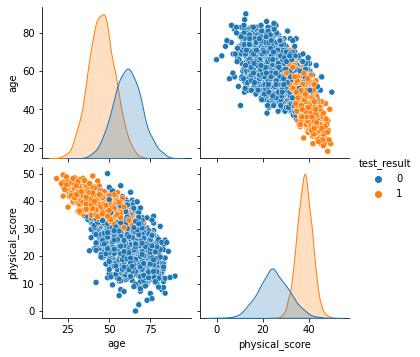

In [14]:
sns.pairplot(df, hue = 'test_result')

<AxesSubplot:>

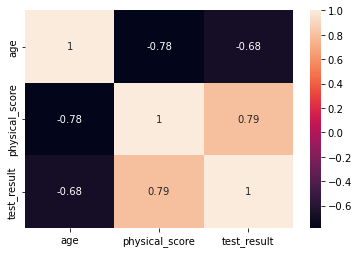

In [15]:
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

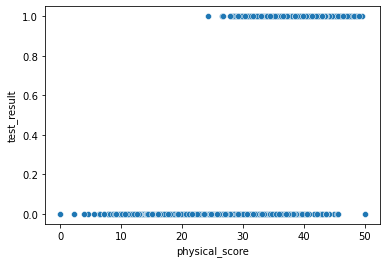

In [16]:
sns.scatterplot(x ='physical_score', y = 'test_result', data =df) #we never prefer scatterplots for predicting classes 

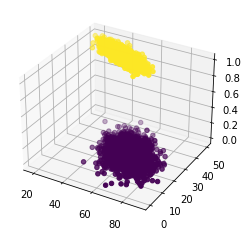

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c= df['test_result'])

In [22]:
#separating the features

X =df.drop('test_result', axis = 1)

In [19]:
y = df['test_result']

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.1, random_state=101)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
scaled_X_train = scaler.fit_transform(X_train)

In [26]:
scaled_X_test = scaler.transform(X_test)

In [27]:
# Logistic Regression model fit
from sklearn.linear_model import LogisticRegression

In [28]:
log_model = LogisticRegression()

In [29]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [30]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [31]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [32]:
y_pred[0]

1

In [33]:
#Checking for Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
accuracy_score(y_test, y_pred)

0.93

In [35]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [36]:
from sklearn.metrics import plot_confusion_matrix

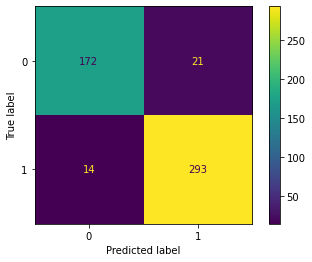

In [37]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [39]:
from sklearn.metrics import precision_score, recall_score

In [40]:
precision_score(y_pred, y_test)

0.9543973941368078

In [41]:
recall_score(y_pred, y_test)

0.9331210191082803